# ASSINGMENT 1

In [32]:
#Load data sets
import pandas as pd
ud=pd.read_csv("Uber_Drives_2016.csv")
ud.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#Display the number of rows and columns.

In [12]:
#
print(ud.shape)

(1156, 7)


In [19]:
# showing all column names
ud.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [20]:
#data types of each column
ud.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [21]:
#  unique values in CATEGORY column
ud['CATEGORY*'].unique()

array(['Business', 'Personal', nan], dtype=object)

In [23]:
#  null values in PURPOSE column
ud['PURPOSE*'].isnull().sum()

np.int64(503)

In [25]:
# renaming all columns to uppercase & removing *
ud.columns = ud.columns.str.replace('*', '', regex=False).str.upper()
ud.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

# ASSINGMENT 2

In [26]:
# filte  rides category is Business
ud[ud['CATEGORY'] == 'Business']

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [27]:
# showing top 5 longest trips based on miles
ud.sort_values(by='MILES', ascending=False).head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting
881,10/30/2016 15:22,10/30/2016 18:23,Business,Asheville,Mebane,195.9,NaN
776,9/27/2016 21:01,9/28/2016 2:37,Business,Unknown Location,Unknown Location,195.6,NaN


In [29]:
# null values in purpose column
ud['PURPOSE'] = ud['PURPOSE'].fillna("Not Specified")
ud['PURPOSE'].isnull().sum()

np.int64(0)

In [43]:
#Would you like me to show how to convert that TRIP_DURATION into hours or minutes for easier analysis
ud['TRIP_DURATION'] = ud['END_DATE'] - ud['START_DATE']
ud[['START_DATE', 'END_DATE', 'TRIP_DURATION']].head()


,START_DATE,END_DATE,TRIP_DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0 days 01:07:00


In [44]:
#just to view a small sample of your data and confirm that the TRIP_DURATION calculation worked correctly
ud[['START_DATE', 'END_DATE', 'TRIP_DURATION']].head()

,START_DATE,END_DATE,TRIP_DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,0 days 01:07:00


In [45]:
#show how to sort by multiple columns (e.g., by category and miles)
ud.sort_values(by='MILES', ascending=False)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,0 days 05:30:00
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201.0,Meeting,0 days 02:45:00
881,2016-10-30 15:22:00,2016-10-30 18:23:00,Business,Asheville,Mebane,195.9,NaN,0 days 03:01:00
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,NaN,0 days 05:36:00
546,2016-07-14 16:39:00,2016-07-14 20:05:00,Business,Morrisville,Banner Elk,195.3,NaN,0 days 03:26:00
...,...,...,...,...,...,...,...,...
1110,2016-12-24 22:04:00,2016-12-24 22:09:00,Business,Lahore,Lahore,0.6,Errand/Supplies,0 days 00:05:00
516,2016-07-05 16:48:00,2016-07-05 16:52:00,Business,Whitebridge,Whitebridge,0.6,Errand/Supplies,0 days 00:04:00
44,2016-01-26 17:27:00,2016-01-26 17:29:00,Business,Cary,Cary,0.5,Errand/Supplies,0 days 00:02:00
120,2016-02-17 16:38:00,2016-02-17 16:43:00,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies,0 days 00:05:00


# ASSINGMENT 3

In [46]:
# average miles per category
a_miles = ud.groupby('CATEGORY')['MILES'].mean()
a_miles

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64

In [47]:
# counting trips based on purpose
p_count = ud['PURPOSE'].value_counts()
p_count

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64

In [48]:
# finding top 3 most common start locations
t_start_loc = ud['START'].value_counts().head(3)
t_start_loc

START
Cary                201
Unknown Location    148
Morrisville          85
Name: count, dtype: int64

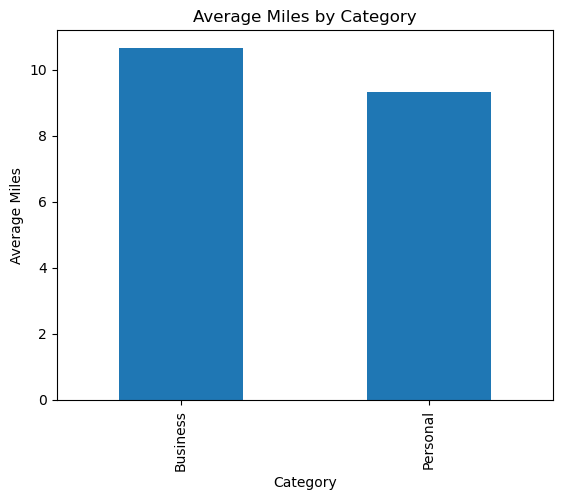

In [51]:
#that’s a Matplotlib bar chart command that visualizes the average miles per category.
import matplotlib.pyplot as plt

# bar chart of average miles
a_miles.plot(kind='bar')

plt.title("Average Miles by Category")
plt.xlabel("Category")
plt.ylabel("Average Miles")
plt.show()

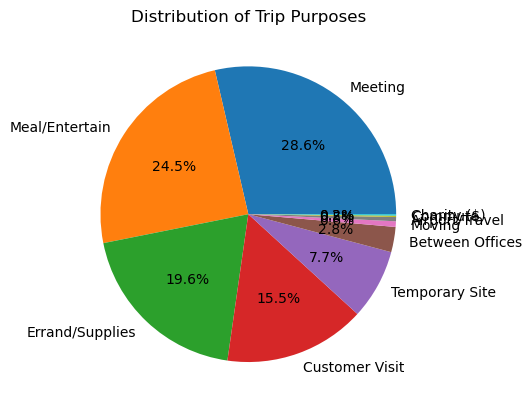

In [52]:
# pie chart of trip purposes
p_count.plot(kind='pie', autopct='%1.1f%%')

plt.title("Distribution of Trip Purposes")
plt.ylabel("")  
plt.show()